<a href="https://colab.research.google.com/github/justcating/pypairs/blob/main/%D0%94%D0%97_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [3]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [4]:
df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,age,embarked,fare
0,3,22.0,S,7.2500
1,1,38.0,C,71.2833
2,3,26.0,S,7.9250
3,1,35.0,S,53.1000
4,3,35.0,S,8.0500


# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

(891,)

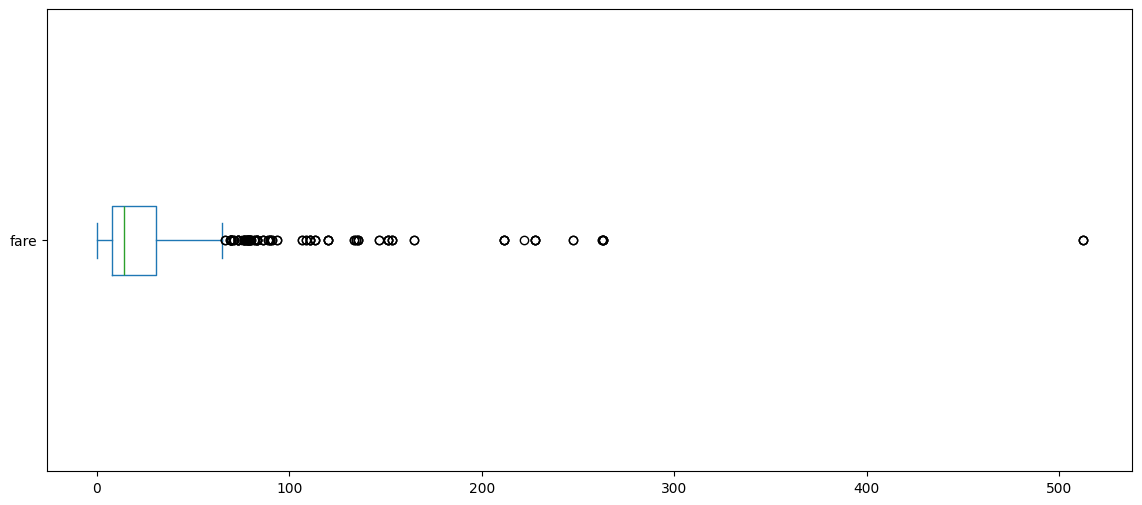

In [5]:
df['fare'].plot(kind='box', vert = False, figsize=(14,6))
df['fare'].shape

<Axes: >

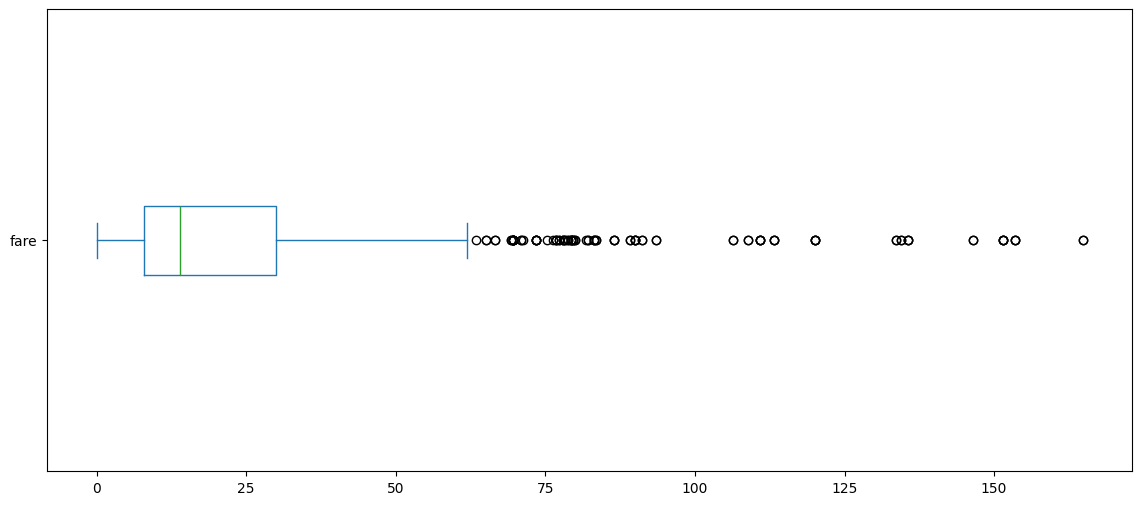

In [8]:
df= df[df['fare'] < 200]
df['fare'].plot(kind='box', vert = False, figsize=(14,6))

In [9]:
X = df[['pclass', 'age', 'embarked']]
y = df['fare']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,
                                                    random_state=42)

# Завдання 2
Створіть Pipeline для обробки даних

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [12]:
num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns

In [14]:
num_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

In [16]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_columns),
    ('cat', cat_transformer, cat_columns) ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['pclass', 'age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['embarked'], dtype='object'))])

# Завдання 3
Об'єднайте дерево рішень з препроцесором та натренуйте їх

In [18]:
from sklearn.tree import DecisionTreeRegressor

model = Pipeline([
    ('prep', preprocessor),
    ('tree', DecisionTreeRegressor(max_depth = 3))
])

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=3))])

# Завдання 4
Виведіть основні метрики моделі

In [20]:
from sklearn import metrics

In [29]:
y_pred = model.predict(X_test)

metrics.r2_score(y_test, y_pred)

0.5371518777004776

# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer(SimpleImputer vs KNNImputer) та кодування категоріальних даних(OneHotEncoder vs OrdinaryEncoder))
* змінити параметри дерева(глибина, кількість точок у листках тощо)

In [30]:
df2 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [31]:
X2 = df2[['pclass', 'age', 'embarked']]
y2 = df2['fare']

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=.8,
                                                        random_state=42)

In [33]:
num_columns2 = X2_train.select_dtypes(include='number').columns
cat_columns2 = X2_train.select_dtypes(include='object').columns

In [37]:
num_transformer2 = Pipeline([
    ('impute', KNNImputer(n_neighbors=5))
])

cat_transformer2 = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [36]:
preprocessor2 = ColumnTransformer([
    ('num', num_transformer2, num_columns2),
    ('cat', cat_transformer2, cat_columns2)
])
preprocessor2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['pclass', 'age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['embarked'], dtype='object'))])

In [38]:
model2 = Pipeline([
    ('prep', preprocessor2),
    ('tree', DecisionTreeRegressor(max_depth = 3))
])

In [39]:
model2.fit(X2_train, y2_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=3))])

In [40]:
y2_pred = model2.predict(X2_test)

metrics.r2_score(y2_test, y2_pred)

0.11155502238871329

In [ ]:
# модель стала надабагато гірше так як r2 зменшився

In [43]:
model3 = Pipeline([
    ('prep', preprocessor2),
    ('tree', DecisionTreeRegressor(
        max_depth = 5,
        max_features='log2',
        min_samples_leaf=3,
        min_samples_split=4,
        random_state=42))
])

In [44]:
model3.fit(X2_train, y2_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=5, max_features='log2',
                                       min_samples_leaf=3, min_samples_split=4,
                                       random_state=42))])

In [46]:
y_pred3 = model3.predict(X2_test)

metrics.r2_score(y2_test, y_pred3)

-0.1983857206654247

In [ ]:
# модель з KNNImputer, OrdinaryEncoder та зміненими параметрами дерева працює набагато гірше ніж було до цього

# Завдання 6
Збережіть модель

In [47]:
import joblib

joblib.dump(model3, 'model3.pkl')

['model3.pkl']